In [9]:
from pandas import read_csv
from datetime import datetime   
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

In [6]:
series = (
    read_csv(
        "../chap07/data/sales.csv",
        header=0,
        parse_dates=[0],          # 0번째 열을 날짜로 파싱
        date_format="%Y-%m-%d",   # ← 실제 포맷으로 바꿔주세요 (예: "%Y-%m", "%Y/%m/%d" 등)
        index_col=0,
        usecols=[0, 1]            # 날짜열 + 값 1개 열만 읽기(Series로 만들기 쉽게)
    )
    .squeeze("columns")           # 단일 컬럼이면 Series로
)

c:\Users\sd39a\anaconda3\envs\study\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\sd39a\anaconda3\envs\study\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\sd39a\anaconda3\envs\study\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\sd39a\anaconda3\envs\study\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Sun, 28 Sep 2025   AIC                            411.302
Time:                        21:22:50   BIC                            420.634
Sample:                             0   HQIC                           414.523
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

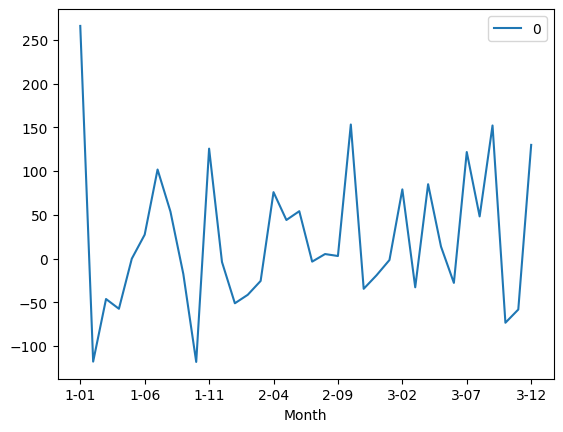

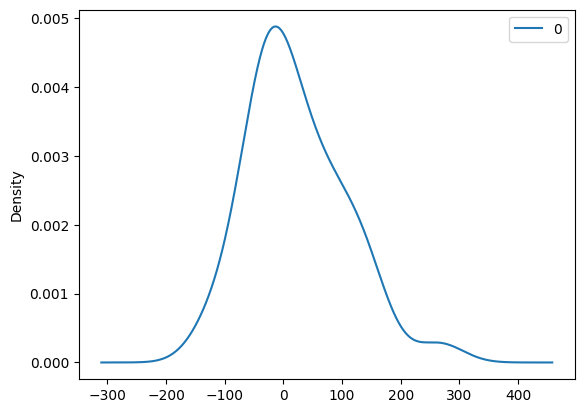

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [10]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
'''
1번쨰 그림: 오차 정보
2번쨰그림 : 밀도 정보
값이 살짝 치우져 있음(평균 0이 아님)
'''

predicted = 352.855344, expected=346.300000
predicted = 277.398036, expected=329.700000
predicted = 368.753734, expected=445.400000
predicted = 331.773635, expected=325.900000
predicted = 372.070412, expected=449.300000
predicted = 360.020872, expected=411.300000
predicted = 454.526230, expected=417.400000
predicted = 388.690701, expected=545.500000
predicted = 437.632447, expected=477.600000
predicted = 516.437624, expected=687.000000
predicted = 520.916191, expected=435.300000
predicted = 675.594647, expected=587.300000
predicted = 505.201016, expected=676.900000
TEST MSE: 9118.818


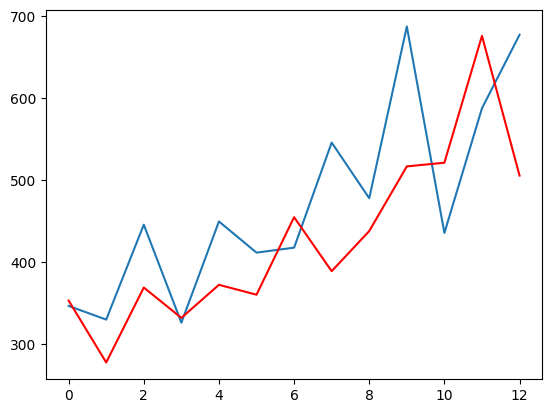

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected=%f' %(y_hat, obs))
error = mean_squared_error(test, predictions)
print('TEST MSE: %.3f' %error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
